# Introduction to Programming Lecture 12

* Instructor :  Andrew Yarmola [andrew.yarmola@uni.lu](mailto:andrew.yarmola@uni.lu)
* Course Schedule : Wednesday 14h00 - 15h30 Campus Kirchberg B21
* Course Website : [sites.google.com/site/andrewyarmola/itp-uni-lux](https://sites.google.com/site/andrewyarmola/itp-uni-lux)
* Office Hours : Thursday 16h00 - 17h00 Campus Kirchberg G103 and by appointment.

## There will not be a Project 2, we will just have joint Final Projects

I've decided to skip Project 2. In effect, we will a Project 1 as a midterm and the Final Project as our final.

## Last homework due Friday Dec 23

## `scipy` package

The `scipy` package is composed of many useful task-specific modules
* `scipy.cluster` - Vector quantization / Kmeans
* `scipy.constants` - Physical and mathematical constants
* `scipy.fftpack` - Fourier transform
* `scipy.integrate` - Integration routines
* `scipy.interpolate` - Interpolation
* `scipy.io` - Data input and output
* `scipy.linalg` - Linear algebra routines
* `scipy.ndimage` - n-dimensional image package
* `scipy.odr` - Orthogonal distance regression
* `scipy.optimize` - Optimization
* `scipy.signal` - Signal processing
* `scipy.sparse` - Sparse matrices
* `scipy.spatial` - Spatial data structures and algorithms
* `scipy.special` - Any special mathematical functions
* `scipy.stats` - Statistics

## Fast Fourier Transforms

Recall that Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the function from those components. This process can also be done with discrete data.

<img src="fourier.gif">

Given a function $g : [a,b] \to \mathbb{C}$ and a sampling interval $\Delta t$, we can build a sequence $g_n = g(a + n \Delta t)$ for $n = 0, \ldots N-1$. The **discrete Fourier transform** of $\{g_n\}$ is a sequence $\{G_k\}$ such that $$g_n = \frac{1}{N} \sum_{k = 0}^{N-1} G_k \; \mathrm{exp}\left(2 \pi i \frac{nk}{N} \right) =  \frac{1}{N} \sum_{k = 0}^{N-1} G_k\left(\cos\left(2 \pi \frac{nk}{N}\right) + i \sin\left(2 \pi \frac{nk}{N}\right)\right)$$

As you can see, the goal is to express $g_n$ in terms of periodic components. With respect to the original interval $[a,b]$ then "true" frequency is given by $f_k = \frac{k}{N \, \Delta t} = \frac{k}{b-a}$ Hz.

It is not hard to show that $$G_k = \sum_{n = 0}^{N-1} g_n \; \mathrm{exp}\left(- 2 \pi i \frac{nk}{N} \right)$$

Let $g = [g_0, \ldots, g_{N-1}]$. In `scipy.fftpack`, the function `scipy.fftpack.fft(g)` returns the list
$$[G_0, G_1, \ldots, G_{\lfloor N/2 \rfloor}, G_{1 - \lfloor N/2 \rfloor}, G_{2 - \lfloor N/2 \rfloor}, \ldots, G_{-1}]$$

So the first half of the list is the "positive" frequencies and the second half is the "negative" frequencies. If $g$ is real valued, then DFT is symmetric under complex conjugation (i.e. $G_k = \overline{G_{-k}}$)

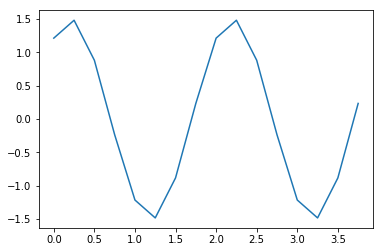

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

time_step = 0.25
amplitude = 1.5
shift = -0.2
period = 2. # 0.5 Hz
time_vec = np.arange(0, 4, time_step)
sig = amplitude * np.cos(2 * np.pi / period * (time_vec+shift))
    
plt.plot(time_vec, sig)
plt.show()

In [2]:
from scipy import fftpack

sig_ft = fftpack.fft(sig)

print(sig_ft)

[ 1.05471187e-15+0.00000000e+00j -3.63808984e-15+1.96454098e-15j
  9.70820393e+00-7.05342303e+00j  2.83291731e-15-1.61783758e-15j
  0.00000000e+00-7.21644966e-16j  1.23319834e-16-2.42982234e-15j
  8.88178420e-16-1.33226763e-15j  1.57003111e-15+2.64377801e-16j
  2.49800181e-15+0.00000000e+00j  1.57003111e-15-2.64377801e-16j
  8.88178420e-16+1.33226763e-15j  1.23319834e-16+2.42982234e-15j
  0.00000000e+00+7.21644966e-16j  2.83291731e-15+1.61783758e-15j
  9.70820393e+00+7.05342303e+00j -3.63808984e-15-1.96454098e-15j]


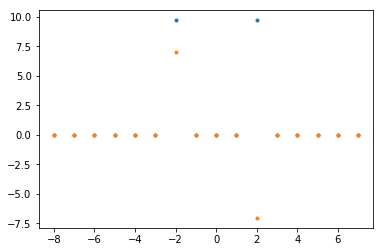

In [3]:
# gives k/(n * dt)
n = sig.size
freq_values = fftpack.fftfreq(n, time_step)
k_values = freq_values * (n * time_step)

plt.plot(k_values, sig_ft.real, '.')
plt.plot(k_values, sig_ft.imag, '.')
plt.show()

We can clearly see that $k = \pm 2$ (i.e. $2/(4-0) = 0.5$ Hz) is our frequency. Further, we can recover :

In [4]:
import cmath

freq = 1/2.
g2 = sig_ft[2]
#print(abs(g2))
# these take a little math using the inverse
print("Amplitude/Power :", 2*abs(g2)/n)
print("Phase : ", (1/freq) * 
      cmath.log(g2/abs(g2))/(2*np.pi*1.j))

Amplitude/Power : 1.5000000000000002
Phase :  (-0.20000000000000018+4.4174370575882186e-17j)


** Remark : ** Notice that **multiplying** a Fourier coefficient by $\exp(2 \pi i  p)$ corresponds to shifting the phase of that frequency.

### Removing noise from signal

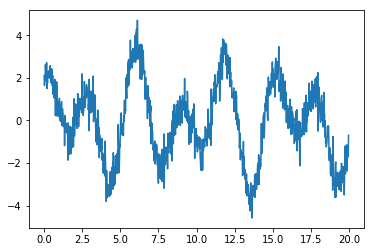

In [5]:
import numpy as np
from matplotlib import pyplot as plt

time_step = 0.02
time_vec = np.arange(0, 20, time_step)
p1 = 5. # freq 0.2 Hz
p2 = 3. # freq 0.3333 Hz
a1 = 1.5
a2 = 2.
sig = a1*np.sin(2 * np.pi / p1 * time_vec) + \
      a2*np.cos(2 * np.pi / p2 * time_vec) + \
      0.5 * np.random.randn(time_vec.size)
    
plt.plot(time_vec, sig)
plt.show()

The observer doesn’t know the signal frequencies, only the sampling time step of the signal `sig`. The signal is supposed to come from a real valued function so the Fourier transform will be symmetric. The `scipy.fftpack.fftfreq()` function will generate the sampling frequencies and `scipy.fftpack.fft()` will compute the fast Fourier transform :

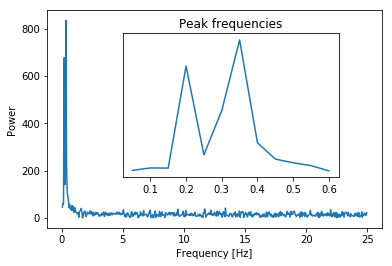

In [6]:
from scipy import fftpack

sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

# we only care about positive frequencies
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

plt.clf()
plt.plot(freqs, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
axes = plt.axes([0.3, 0.3, 0.5, 0.5])

plt.title('Peak frequencies')
plt.plot(freqs[:12], power[:12])
plt.setp(axes, yticks=[])

plt.show()

We can now clear the noise from the Fourier transform :

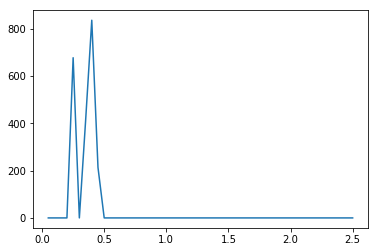

In [7]:
sig_fft[np.abs(sig_fft) < 200] = 0.
plt.plot(freqs[:50], np.abs(sig_fft)[:50])
plt.show()

The resulting filtered signal can be computed by the scipy.fftpack.ifft() function :

In [8]:
main_sig = fftpack.ifft(sig_fft).real

Let's see whhat we got :

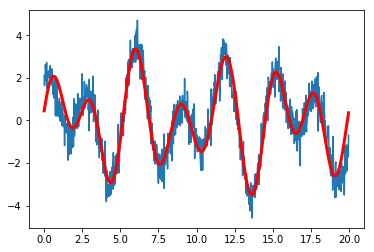

In [9]:
plt.clf()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, color='red', linewidth=3.0)
plt.show()

### 2D Fourier transform and images

By using higher dimensional analogs of periodic functions, one can also define and n-dimensional Fourier transform. For $n = 2$ and $g : [a,b]^2 \to \mathbb{C}$, one has $$G_{k,l} = \sum_{m = 0}^{M-1}\sum_{n = 0}^{N-1} g_{m,n} \; \mathrm{exp}\left( - 2 \pi i \left( \frac{m k}{M} + \frac{nl}{N}\right)\right)$$

### Removing periodic noise from image

Consider the following image with lots of periodic noise.

**Note :** This is just a demo, this is not a good way to remove noise in general.

<img src="moonlanding.png" width=70%>

We would like to remove the noise and get a clear picture.

(474, 630)


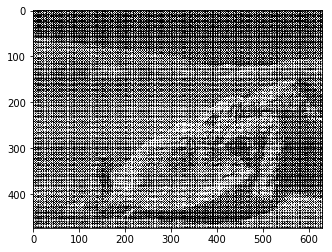

In [10]:
img = plt.imread('moonlanding.png')
# this is a black and white image
# as there is no 3rd dimension
print(img.shape)
plt.imshow(img, cmap="gray")
plt.show()

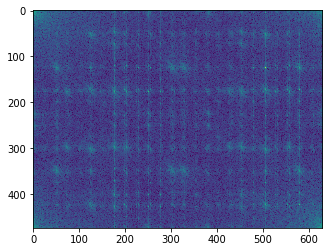

In [11]:
# let's see what we get for fft
img_ft = fftpack.fft2(img)
power = np.abs(img_ft)
plt.imshow(np.log(5+power))
plt.show()

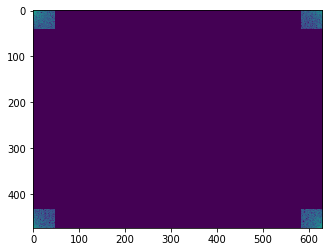

In [12]:
r_keep = 42
c_keep = 48
new_ft = img_ft.copy()
new_ft[r_keep : -r_keep, :] = 0.
new_ft[:, c_keep : -c_keep] = 0.

plt.imshow(np.log(5+np.abs(new_ft)))
plt.show()

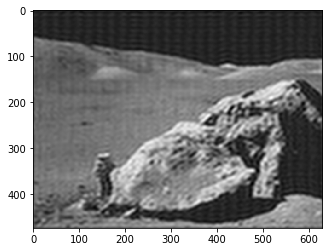

In [13]:
new_img = fftpack.ifft2(new_ft).real

plt.imshow(new_img, cmap = 'gray')
plt.show()

## Basic fitting 

Given some data and a model with a fixed number of parameters, you might want to find the best (least squares) fit of your data. You can do this using `scipy.optimize.curve_fit`.

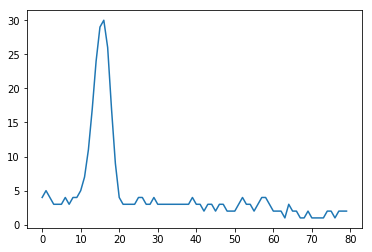

In [14]:
# we can load data!
data = np.load('waveform_1.npy')
x_vals = np.arange(len(data))

plt.plot(x_vals, data)
plt.show()

Imagine we want to fit this is a Gaussian model $$ B + A \exp\left(- \left(\frac{t-\mu}{\sigma}\right)^2\right)$$

[ 2.70363498 27.82022611 15.47923812  3.05635768]


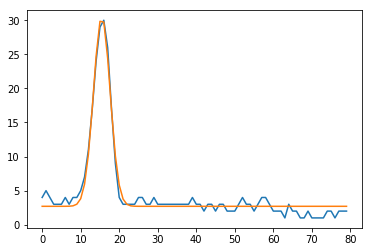

In [15]:
from scipy import optimize

def g(t, b, a, m, s) :
    return b + a * np.exp(-((t-m)/s)**2)

guess = [3., 20., 15., 3.]
params, params_covar = optimize.curve_fit(g, x_vals, data, guess)

print(params)

plt.plot(x_vals, data)
plt.plot(x_vals, g(x_vals, *params))
plt.show()

## Statistics

Statistics in `python` can be done using `scipy` + `matplotlib` (mostly basic tools), `pandas` + `statsmodels` + `seaborn` (similar but simpler than R), `PyMC` (Bayesian statistical models).

### Histograms

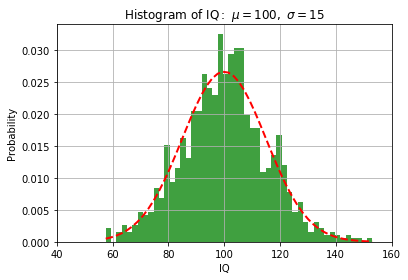

In [18]:
from scipy import stats

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(1000)

# the histogram of the data
n, bins, patches = plt.hist(x, bins = 50, density=1,
                            facecolor='green', alpha=0.75)
# add a 'best fit' line
y = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2.)

plt.xlabel('IQ')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.034])
plt.grid(True)

plt.show()

To get the actual histogram data, we use `numpy.histogram`.

In [19]:
hist, bins = np.histogram(x, bins = 50, normed = 1)

### Basic stats

`scipy.stats` contains most random variables you would want. See the documentation for a complete list.

It also provides some statistical functions. Here are a few examples :

In [20]:
# describe
stats.describe(x)

DescribeResult(nobs=1000, minmax=(57.56814319725335, 153.09310710554172), mean=100.3763916464132, variance=230.6844608494801, skewness=0.06859400014818551, kurtosis=0.1259294447202115)

In [21]:
# Bayesian confidence intervals for the mean, var, and std
stats.bayes_mvs(x)

(Mean(statistic=100.3763916464132, minmax=(99.58564138656014, 101.16714190626625)),
 Variance(statistic=231.1472180427589, minmax=(214.64662962813247, 248.70065470247985)),
 Std_dev(statistic=15.199714660201353, minmax=(14.650823513650433, 15.770245866900105)))

In [22]:
# percentiles
print(stats.scoreatpercentile(x,90))

120.15351557513775


In [23]:
# chisquare
stats.chisquare(hist, stats.norm.pdf(bins[:-1], mu, sigma))

Power_divergenceResult(statistic=0.03414551564829696, pvalue=1.0)

In [24]:
# T-test
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-3.05538603064692, pvalue=0.002831966139512011)

### Example with `pandas` and `seaborn`

See the SciPy Lecture notes for more detailed introduction.

We will work with a dataset of wages based on gender and education.

In [26]:
import pandas

# EDUCATION: Number of years of education (columns 0)
# SEX: 1=Female, 0=Male (column 2)
# WAGE: Wage (dollars per hour) (columns 5)

data = pandas.read_csv('wages.txt', skiprows=27,
                       skipfooter=6, sep=None,
                       header=None,
                       names=['education', 'gender', 'wage'],
                       usecols=[0, 2, 5],
                       engine = 'python')

print(type(data))
data[:8]

<class 'pandas.core.frame.DataFrame'>


,education,gender,wage
0,8,1,5.10
1,9,1,4.95
2,12,0,6.67
3,12,0,4.00
4,12,0,7.50
5,13,0,13.07
6,10,0,4.45
7,12,0,19.47


In [27]:
# Convert genders to strings (this is 
# particulary useful so that the
# statsmodels formulas detects that
# gender is a categorical variable)
# Look up how numpy.choose works.
# You can also do this using vectorized maps.

data['gender'] = np.choose(data.gender, ['male', 'female'])

# Notice that data['gender'] and data.gender
# are same thing
data[:8]

,education,gender,wage
0,8,female,5.10
1,9,female,4.95
2,12,male,6.67
3,12,male,4.00
4,12,male,7.50
5,13,male,13.07
6,10,male,4.45
7,12,male,19.47


In [28]:
# We can do grouping
groupby_gender = data.groupby('gender')
# we can get the gender means
groupby_gender.mean()

,education,wage
gender,,
female,13.024490,7.878857
male,13.013841,9.994913


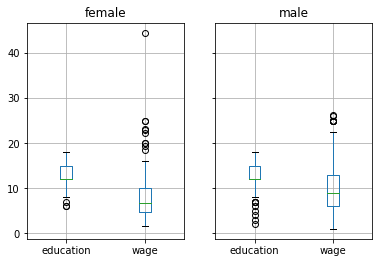

In [29]:
_ = groupby_gender.boxplot(column=['education','wage'],
                       return_type='dict')

In [30]:
# Log-transform the wages, because they typically are increased with
# multiplicative factors
data['wage'] = np.log10(data['wage'])

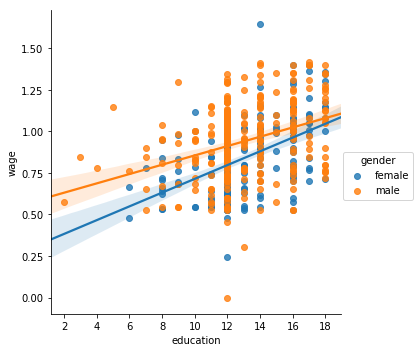

In [32]:
# simple plotting
import seaborn

# Plot 2 linear fits for male and female.
seaborn.lmplot(y='wage', x='education', hue='gender', data=data)

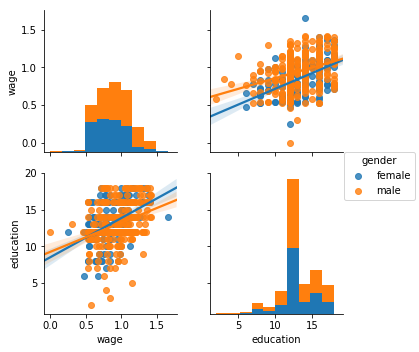

In [33]:
# Several plots at once
seaborn.pairplot(data, vars=['wage', 'education'],
                      kind='reg', hue='gender')

In [34]:
# Ordinary Least Squares
import statsmodels.formula.api as sm

# Assume what wage depends linearly on 
# education, gender, and gender*education
# i.e. does more education benefit males
# more than females?
form = 'wage ~ education + gender + education * gender'

model = sm.ols(formula = form, data=data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Sun, 06 May 2018   Prob (F-statistic):           2.94e-25
Time:                        01:05:24   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [35]:
model.pvalues

Intercept                   3.512968e-05
gender[T.male]              3.092571e-03
education                   9.767921e-14
education:gender[T.male]    5.553993e-02
dtype: float64

## Mathematical Morphology

Mathematical morphology in our setting is the study of shapes in an image. In essense, these are tools that let you grow (i.e. dilate) a region, shrink (i.e. erode) a region, or ther operations.

<img src="morpho_mat.png">

In the image above, the starting shape is dark blue, the shape after the operation if light blue (with the exception of closing, where the result is the union).

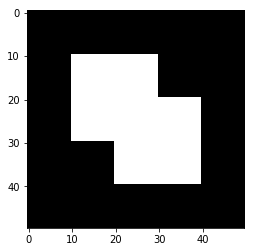

In [36]:
a = np.zeros((50, 50))
a[10:30, 10:30] = 1
a[20:40, 20:40] = 1

plt.grid(False)
plt.imshow(a, cmap='gray', interpolation='nearest')
plt.show()

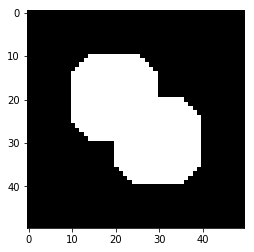

In [37]:
from scipy import ndimage

opened_mask = ndimage.binary_opening(a, iterations=4)
plt.grid(False)
plt.imshow(opened_mask, cmap='gray', interpolation='nearest')
plt.show()

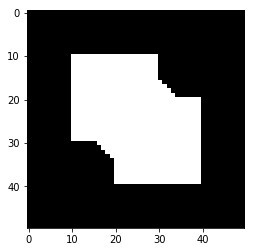

In [38]:
closed_mask = ndimage.binary_closing(a, iterations=4)
plt.grid(False)
plt.imshow(closed_mask, cmap='gray', interpolation='nearest')
plt.show()

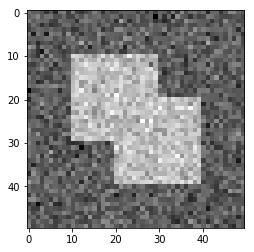

In [39]:
a += 0.25 * np.random.standard_normal(a.shape)


plt.grid(False)
plt.imshow(a, cmap='gray', interpolation='nearest')
plt.show()

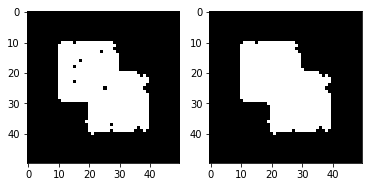

In [40]:
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.grid(False)
plt.imshow(opened_mask, cmap='gray', interpolation='nearest')
fig.add_subplot(1,2,2)
plt.grid(False)
plt.imshow(closed_mask, cmap='gray', interpolation='nearest')
plt.show()

### Gaussian blur using Fourier transforms

We will blur this image of an elephant

<img src="elephant.png" width=50%>


To do this, we will use a 2D Fourier transform to compute the convolution $$f \star g (t) = \int f(z) \, g(t-z) dz$$
Let $\hat{f}$ denote the Fourier transform of $f$. Then,
$$ \widehat{f \star g} = \hat{f} \hat{g}$$

If $g$ is a Dirac delta at a point $p$, then $f \star g (t) = f(t-p)$. If $g$ is a normal distribution, then $f \star g(t)$ is "blurred" (i.e. locally averaged) value of $f(t)$ near $t$.

(200, 300, 3)


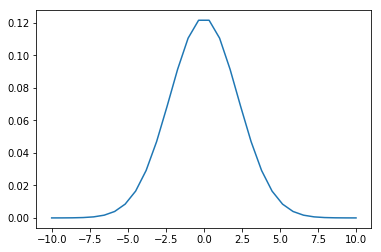

In [45]:
# read image
img = plt.imread('elephant.png')
print(img.shape)

# prepare an 1-D Gaussian convolution kernel
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

plt.plot(t,bump)
plt.show()

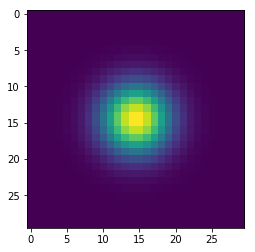

In [46]:
# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

plt.imshow(kernel)
plt.show()

In [47]:
shift = np.zeros(img.shape[:2])
shift[-15,-15] = 1

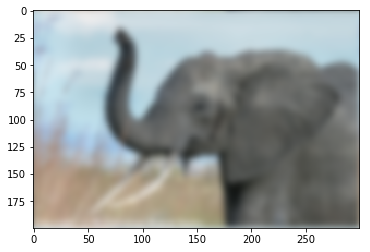

In [48]:
# padded fourier transform, with the same shape as the image
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))
shift_ft = fftpack.fft2(shift, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))
new_img_ft = kernel_ft[..., np.newaxis] * img_ft
new_img_ft *= shift_ft[...,np.newaxis]
new_img = fftpack.ifft2(new_img_ft, axes=(0, 1)).real

# clip values to range
new_img = np.clip(new_img, 0., 1.)

# plot output
plt.clf()
plt.grid(False)
plt.imshow(new_img)
plt.show()